In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import networkx as nx

In [2]:
sim1 = pd.read_csv('/home/rute/Pesquisa/data_dezembro/simout_1.csv')
sim1.columns[1:23]

Index(['xmeas1', 'xmeas2', 'xmeas3', 'xmeas4', 'xmeas5', 'xmeas6', 'xmeas7',
       'xmeas8', 'xmeas9', 'xmeas10', 'xmeas11', 'xmeas12', 'xmeas13',
       'xmeas14', 'xmeas15', 'xmeas16', 'xmeas17', 'xmeas18', 'xmeas19',
       'xmeas20', 'xmeas21', 'xmeas22'],
      dtype='object')

In [3]:
def sig_corr(x1, x2, wlag, t_amostragem,x,y):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    max_index = np.argmax(np.abs(correlations))
    return np.array([max_index*t_amostragem, np.round(correlations[max_index],2)])

In [4]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
   
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    all_dfs_norm['tout'] = all_dfs['tout']
    
    num_linhas = int(len(all_dfs)/len(dfs))
    num_blocks = int(len(all_dfs)/len(dfs[0]))
    
    for i in np.arange(0, num_blocks):
        df = all_dfs_norm.iloc[(i*num_linhas) : (i*num_linhas + num_linhas),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [5]:
def get_dfs(init, end):
    dfs = []
    for i in np.arange(init,end + 1):
        dfs.append(pd.read_csv('/home/rute/Pesquisa/data_dezembro/simout_' + str(i) + '.csv'))
    return dfs

In [6]:
def dfs_by_ft(init):
    dfs_ft = []
    for i in np.arange(init, init + 41, 10):
        dfs_ft.append(get_dfs(i, i+10))
    return dfs_ft


In [7]:
def mean_correlation(wlag, dfs = []):
    matrix_corr_list = []
    m_sum_complete = np.zeros([22 , 22, 2])
    dfs_norm = normalize_dfs(dfs)
    
    for df in dfs_norm:
        tam_m = int(len(df.columns[1:23]))
        m_corr = np.zeros((tam_m,tam_m,2))
        for i, x in enumerate(df.columns[1:23]):
            for j, y in enumerate(df.columns[1:23]):
                m_corr[i][j] = sig_corr(np.array(df[x]), np.array(df[y]),wlag, 0.01, x, y)
        matrix_corr_list.append(m_corr)
        
    for m in matrix_corr_list:
        m_sum_complete = np.add(m_sum_complete, m)
        
    m_sum_complete = m_sum_complete/len(dfs)
    
    return m_sum_complete

In [8]:
def get_most_corr_var( matrix, threshold = None):
    most_correlated_var = []
    for i in np.arange(0, len(matrix[:][:][1]), 1):
        for j in np.arange(0, len(matrix[:][:][1]), 1):
            if threshold == None:
                if(i != j):
                    pair_value = (i, j, matrix[i][j][1], matrix[i][j][0])
                    most_correlated_var.append(pair_value)
            elif (np.abs(matrix[i][j][1]) > threshold and i != j):
                pair_value = (i, j, matrix[i][j][1], matrix[i][j][0])
                most_correlated_var.append(pair_value)
    return most_correlated_var   

In [9]:
disturb_1 = get_dfs(11,14)


In [10]:
wlag = int(20/0.01)
dist = []
for sim_type in disturb_1:
    dist.append(mean_correlation(wlag, [sim_type]))

In [11]:
np.round(1.989,2)

1.99

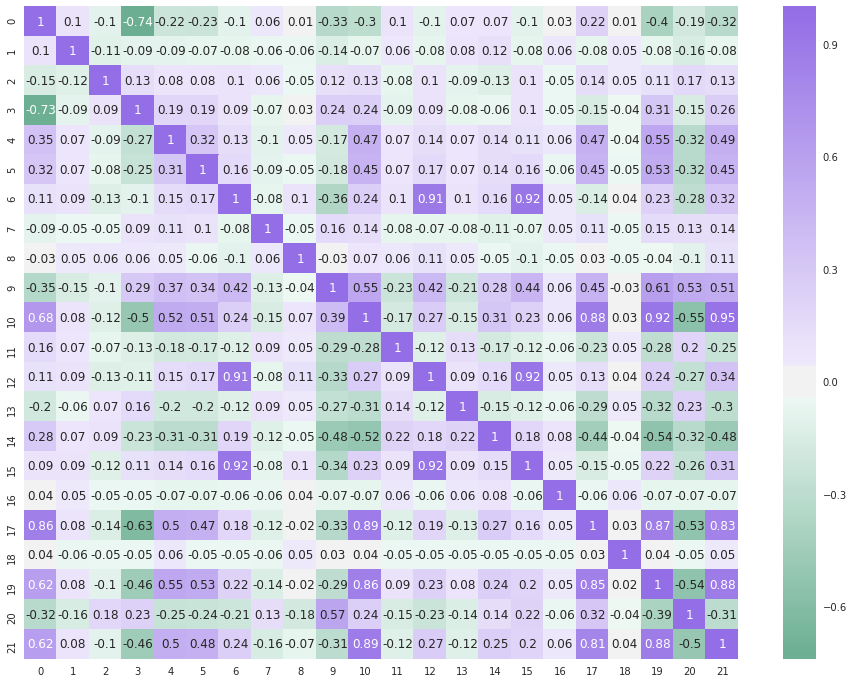

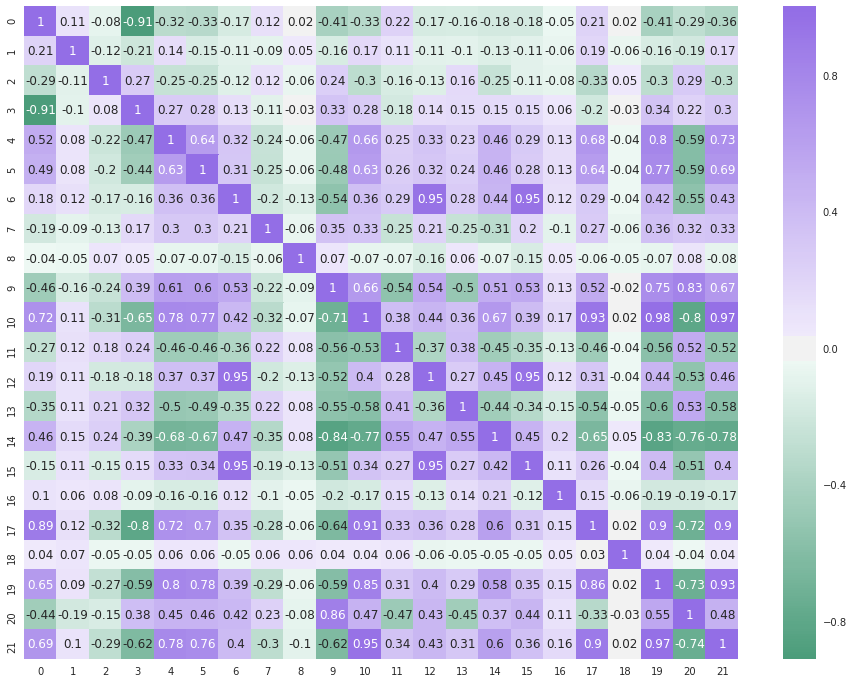

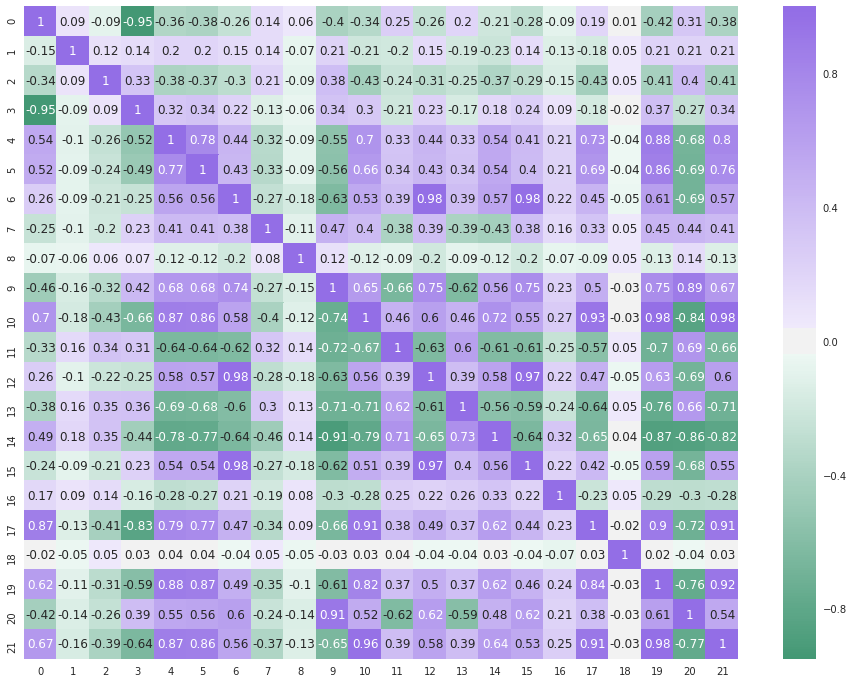

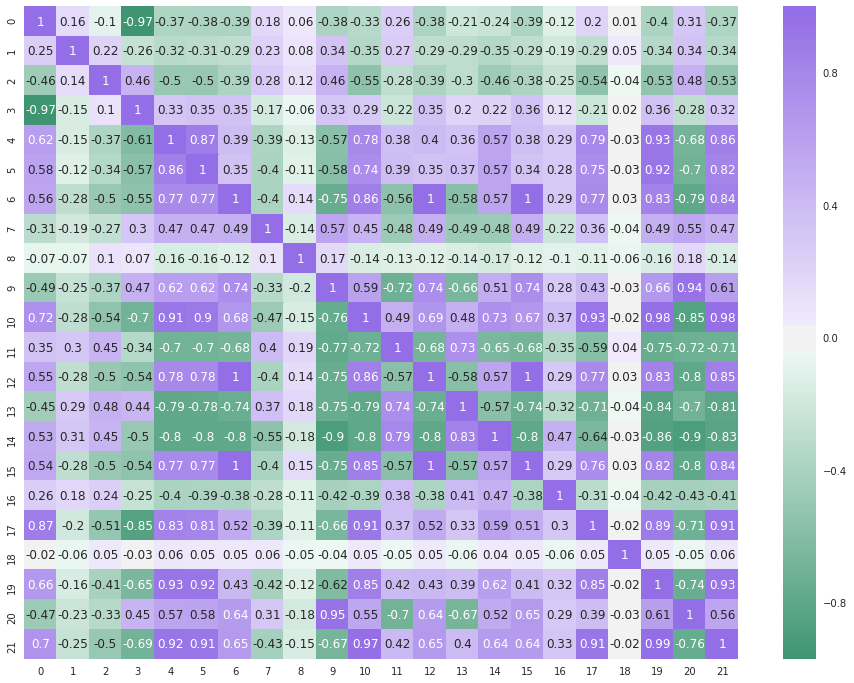

In [12]:
for d in dist:
    d_unit = d[:,:,1]/np.diag(d[:,:,1])
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(16, 12))
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(d_unit, cmap=cmap, center=0, annot=True)
    plt.show()

In [13]:
most_correlated = get_most_corr_var(dist[0], 0.6)
most_correlated[:]

[(0, 3, -0.73999999999999999, 0.040000000000000001),
 (3, 0, -0.72999999999999998, 0.0),
 (6, 12, 0.91000000000000003, 0.0),
 (6, 15, 0.92000000000000004, 0.0),
 (9, 19, 0.60999999999999999, 2.0100000000000002),
 (10, 0, 0.68000000000000005, 4.7300000000000004),
 (10, 17, 0.88, 0.35000000000000003),
 (10, 19, 0.92000000000000004, 0.70000000000000007),
 (10, 21, 0.94999999999999996, 0.02),
 (12, 6, 0.91000000000000003, 0.0),
 (12, 15, 0.92000000000000004, 0.0),
 (15, 6, 0.92000000000000004, 0.0),
 (15, 12, 0.92000000000000004, 0.0),
 (17, 0, 0.85999999999999999, 4.4500000000000002),
 (17, 3, -0.63, 4.5300000000000002),
 (17, 10, 0.89000000000000001, 0.029999999999999999),
 (17, 19, 0.87, 0.38),
 (17, 21, 0.82999999999999996, 0.050000000000000003),
 (19, 0, 0.62, 4.7000000000000002),
 (19, 10, 0.85999999999999999, 0.0),
 (19, 17, 0.84999999999999998, 0.059999999999999998),
 (19, 21, 0.88, 0.0),
 (21, 0, 0.62, 4.8200000000000003),
 (21, 10, 0.89000000000000001, 0.0),
 (21, 17, 0.810000000

In [14]:
x = []
y = []
for corr in most_correlated:
    x.append([corr[0],corr[1]])
    y.append(corr[2])
    

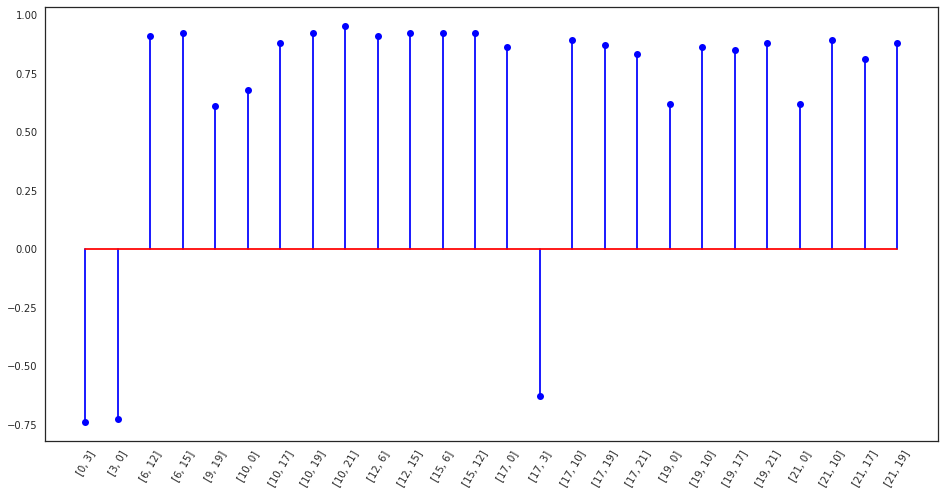

In [15]:
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(16,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

In [16]:
most_correlated
graph_data_corr = []
for corr in most_correlated:
    graph_data_corr.append((corr[0], corr[1]))

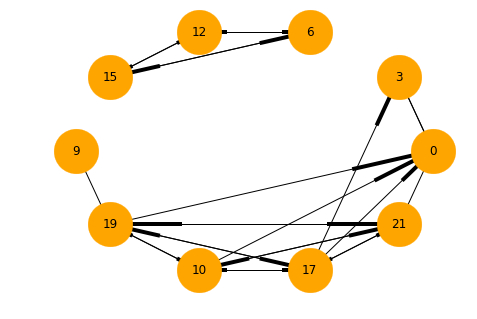

In [19]:
G = nx.MultiDiGraph()
G.add_edges_from(graph_data_corr)
nx.draw_shell(G, with_labels=True, node_size=2000 , arrows=True, node_color='orange', lineheight=0.25)
plt.show()

In [20]:
x_0 =[]
y_0  = []
m = get_most_corr_var(dist[0])
for corr in m:
    x_0.append([corr[0],corr[1]])
    y_0.append(corr[2])

In [ ]:
len(y_0)

In [ ]:
nx.draw_kamada_kawai(G

In [ ]:
x_0_index = [i for i in np.arange(0, len(y_0))]
labels = x_0
plt.figure(figsize=(20,12))
plt.stem(x_0_index,y_0, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_0_index, labels, rotation='vertical')
plt.show()

In [ ]:
G = nx.MultiDiGraph()
G.add_edges_from(most_correlated)
nx.draw_shell(G, with_labels=True, node_size=1500 , arrows=True, node_color='orange', lineheight=0.25)
plt.show()